In [6]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)
library(viridis)

Loading required package: viridisLite



In [2]:
df <- read.table('./Pseudobulk_DEG_all_filterByDefault.xls',
                 header = T)
df %>% head

,Gene,log2FoldChange,logCPM,PValue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,KLRG1,-2.749797,5.042310,8.204122e-24,8.697190e-20
2,CD8A,-4.269271,8.109208,2.466715e-22,9.619647e-19
3,S100A2,5.263620,6.255879,2.722285e-22,9.619647e-19
4,ATF5,3.177553,6.999237,4.774944e-22,1.265480e-18
5,RASA3,-2.319269,5.697017,1.671820e-21,3.544593e-18
6,KLRD1,-3.633756,4.927243,2.415561e-21,4.267894e-18


In [3]:
df$highlight <- rep('no', nrow(df))

gene_list <- c('CD9', "NSMCE1",'TOX','GTSF1','PSMC2','IQCG','KRT86', 'KRT7',
               'TNS3','CXCL13','ATF5','IGFBP4','NCR3',
               'CD7','PIK3R1','CMTM7','ITGA4')
for (nn in gene_list) {
    df[which(df$Gene == nn),'highlight'] <- 'yes'
}

df %>% head

,Gene,log2FoldChange,logCPM,PValue,padj,highlight
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,KLRG1,-2.749797,5.042310,8.204122e-24,8.697190e-20,no
2,CD8A,-4.269271,8.109208,2.466715e-22,9.619647e-19,no
3,S100A2,5.263620,6.255879,2.722285e-22,9.619647e-19,no
4,ATF5,3.177553,6.999237,4.774944e-22,1.265480e-18,yes
5,RASA3,-2.319269,5.697017,1.671820e-21,3.544593e-18,no
6,KLRD1,-3.633756,4.927243,2.415561e-21,4.267894e-18,no


Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


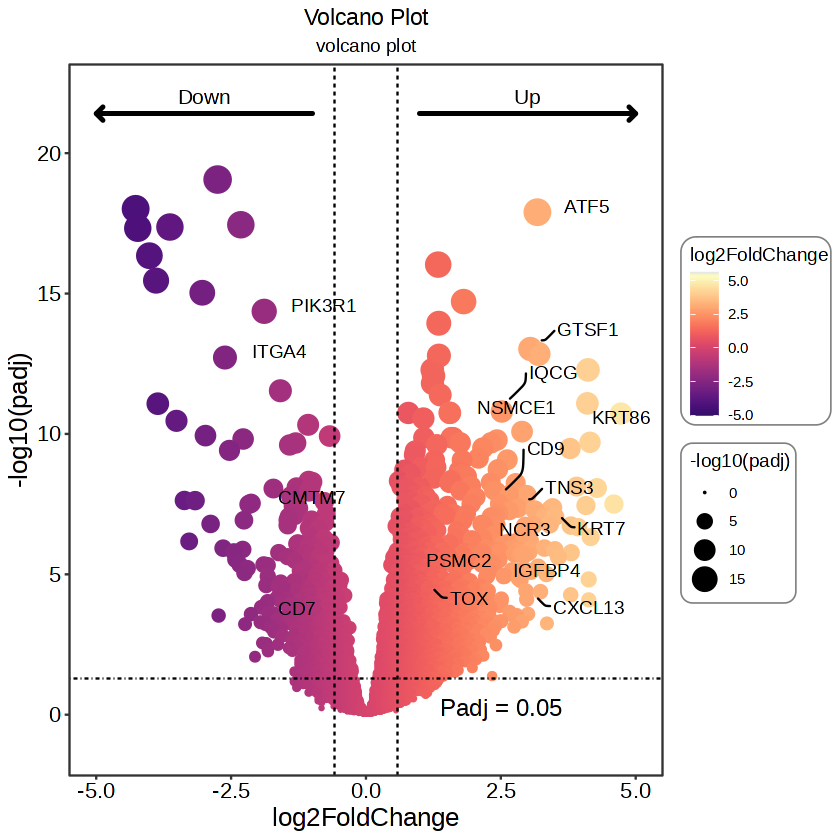

In [8]:
####----plot----####
ggplot(data = df) + 
  geom_point(aes(x = log2FoldChange, y = -log10(padj), 
                 color = log2FoldChange,
                 size = -log10(padj))) + 
  geom_point(data =  df %>%
               tidyr::drop_na() %>%
               dplyr::arrange(desc(-log10(padj))) %>%
               dplyr::slice(1:20),
             aes(x = log2FoldChange, y = -log10(padj),
                 color = log2FoldChange,
                 size = -log10(padj)),
             shape = 20, show.legend = F) +
geom_text_repel(data =  df %>% filter(highlight == 'yes'),
                aes(x = log2FoldChange, y = -log10(padj), label = Gene),
                box.padding = 0.5,
                nudge_x = 0.5,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "y", 
                hjust = "left",
                force = 10,
                point.padding = 1
                  ) +
  scale_color_gradientn(colours = rev(c(colorRampPalette(c("grey90", rev(magma(323, begin = 0.15))[1]))(10), rev(magma(323, begin = 0.18)))),
                        values = seq(0, 1, 0.2)) +
  scale_fill_gradientn(colours = rev(c(colorRampPalette(c("grey90", rev(magma(323, begin = 0.15))[1]))(10), rev(magma(323, begin = 0.18)))),
                       values = seq(0, 1, 0.2)) +
  geom_vline(xintercept = c(-log2(1.5), log2(1.5)), linetype = 2) +
  geom_hline(yintercept = -log10(0.05), linetype = 4) + 
  scale_size(range = c(0,7)) + 
  ggtitle(label = "Volcano Plot",
          subtitle = "volcano plot") + 
  xlim(c(-5, 5)) + 
  ylim(c(-1, 22)) + 
  theme_bw() + 
  theme(panel.grid = element_blank(),
        legend.background = element_roundrect(color = "#808080", linetype = 1),
        axis.text = element_text(size = 13, color = "#000000"),
        axis.title = element_text(size = 15),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)
        ) + 
  annotate(geom = "text", x = 2.5, y = 0.25, label = "Padj = 0.05", size = 5) + 
  coord_cartesian(clip = "off") + 
  annotation_custom(
    grob = grid::segmentsGrob(
      y0 = unit(-10, "pt"),
      y1 = unit(-10, "pt"),
      arrow = arrow(angle = 45, length = unit(.2, "cm"), ends = "first"),
      gp = grid::gpar(lwd = 3, col = "black")
    ), 
    xmin = -5, 
    xmax = -1,
    ymin = 22,
    ymax = 22
  ) +
  annotation_custom(
    grob = grid::textGrob(
      label = "Down",
      gp = grid::gpar(col = "black")
    ),
    xmin = -5, 
    xmax = -1,
    ymin = 22,
    ymax = 22
  ) +
  annotation_custom(
    grob = grid::segmentsGrob(
      y0 = unit(-10, "pt"),
      y1 = unit(-10, "pt"),
      arrow = arrow(angle = 45, length = unit(.2, "cm"), ends = "last"),
      gp = grid::gpar(lwd = 3, col = "black")
    ), 
    xmin = 5, 
    xmax = 1,
    ymin = 22,
    ymax = 22
  ) +
  annotation_custom(
    grob = grid::textGrob(
      label = "Up",
      gp = grid::gpar(col = "black")
    ),
    xmin = 5, 
    xmax = 1,
    ymin = 22,
    ymax = 22
  ) 
ggsave('./figures/malignant_marker_fancy_volcano.pdf', w=7, h=6)